<a href="https://colab.research.google.com/github/HarshitCodex/ClassificationDL/blob/master/Flowers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *
from pathlib import Path


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

In [0]:
path= Config.data_path()/'flowers'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/flowers')

In [0]:
!kaggle datasets list -s flowers-recognition

ref                            title                 size  lastUpdated          downloadCount  
-----------------------------  -------------------  -----  -------------------  -------------  
alxmamaev/flowers-recognition  Flowers Recognition  225MB  2018-06-28 01:34:18          14617  
gverzea/edible-wild-plants     Edible wild plants   765MB  2018-10-14 16:00:35            643  


In [0]:
!kaggle datasets download -d alxmamaev/flowers-recognition -p /content

 94% 212M/225M [00:05<00:00, 28.8MB/s]
100% 225M/225M [00:05<00:00, 45.1MB/s]


In [0]:
!unzip \*.zip

Archive:  flowers-recognition.zip
   creating: flowers/
   creating: flowers/daisy/
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating

In [0]:
path=Path('flowers')

In [0]:
!ls {path}

daisy  dandelion  rose	sunflower  tulip


In [0]:
files=os.listdir(f'{path}/daisy')[:5]
files

['4694730335_2553e77aa5_z.jpg',
 '721595842_bacd80a6ac.jpg',
 '14088053307_1a13a0bf91_n.jpg',
 '5924910021_b6debeb7b5_n.jpg',
 '14350958832_29bdd3a254.jpg']

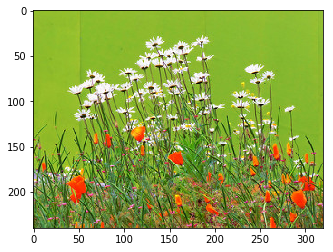

In [0]:
img=plt.imread(f'{path}/daisy/{files[2]}')
plt.imshow(img)

In [0]:
np.random.seed(42)
data=ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

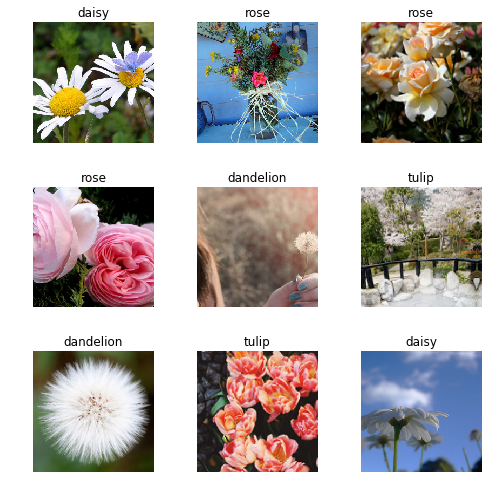

In [0]:
data.show_batch(rows=3,figsize=(7,7))

In [0]:
print(data.classes)
len(data.classes)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


5

In [0]:
learn=cnn_learner(data,models.resnet50,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 102194863.03it/s]


In [0]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.532745,0.287784,0.093750,00:43
1,0.337790,0.254438,0.092593,00:41


In [0]:
learn.save('untuned1')
learn.load('untuned1')

Learner(data=ImageDataBunch;

Train: LabelList (3459 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tulip,tulip,tulip,tulip,tulip
Path: flowers;

Valid: LabelList (864 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dandelion,tulip,dandelion,sunflower,daisy
Path: flowers;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


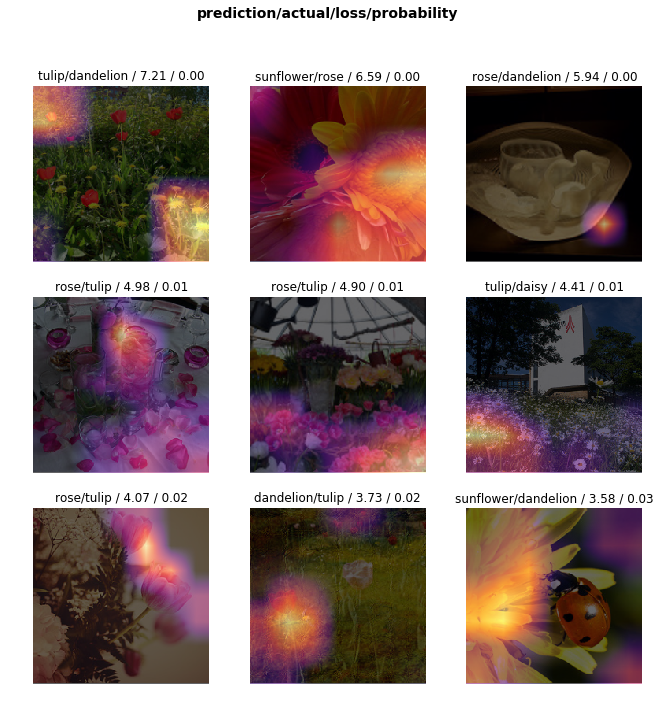

In [0]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9,figsize=(11,11))

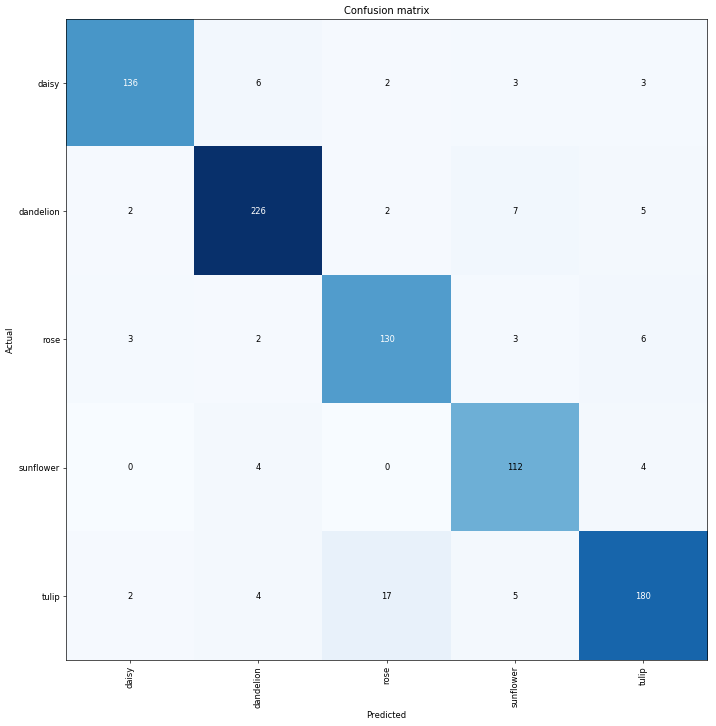

In [0]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [0]:
??interp.plot_confusion_matrix

In [0]:
interp.most_confused(min_val=6)

[('tulip', 'rose', 17),
 ('dandelion', 'sunflower', 7),
 ('daisy', 'dandelion', 6),
 ('rose', 'tulip', 6)]

## FINE TUNING MY MODEL, UNFREEZING, Learning Rates

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.330986,0.305760,0.091435,00:44
1,0.225369,0.188220,0.059028,00:45


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


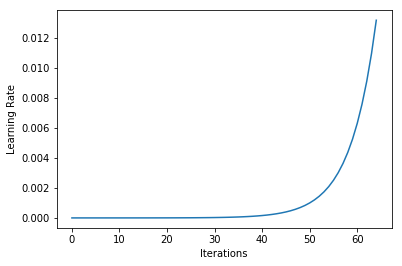

In [0]:
learn.recorder.plot_lr()

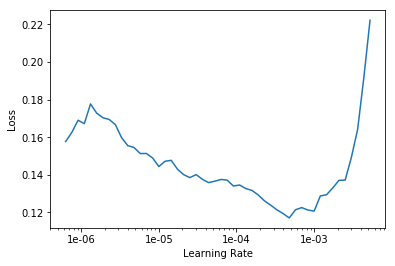

In [0]:
learn.recorder.plot()

In [0]:
# now i got learning rate that is converging nicely in region 1e-04 to 1e-03, so i will try to slice the learning rate in that region so as to get a better minima.
learn.unfreeze()
learn.fit_one_cycle(4,max_lr=slice(1e-04,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.172023,0.374695,0.107639,00:44
1,0.210970,0.249548,0.081019,00:45
2,0.152265,0.166334,0.045139,00:45
3,0.086875,0.171556,0.045139,00:45


In [0]:
#the model has improved quite a lot now

learn.save('tune1')

In [0]:
interp=ClassificationInterpretation.from_learner(learn)

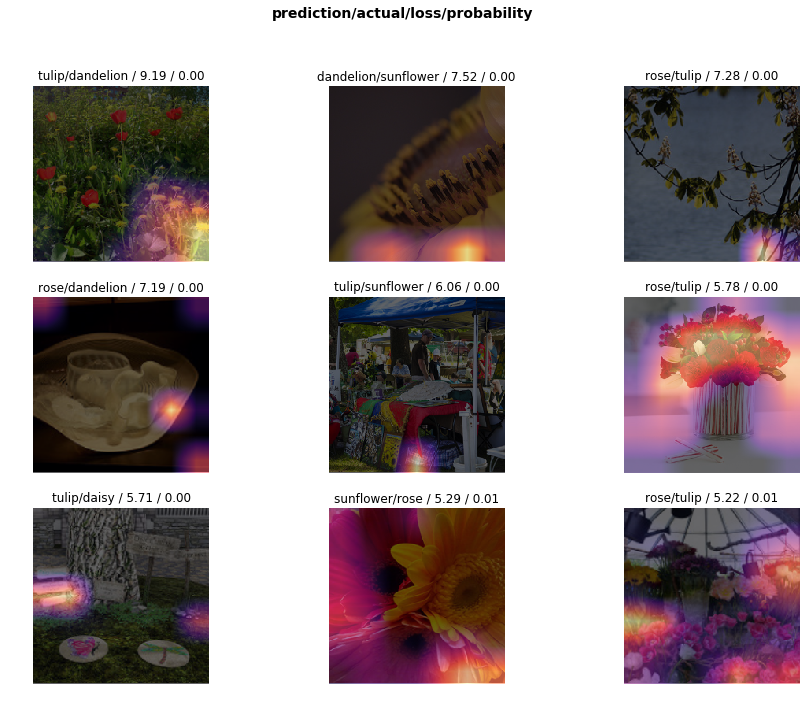

In [0]:
interp.plot_top_losses(9,figsize=(15,11))

#looking at the images, i feel there are some images in the dataset that are actually not good enough , so we need to do some data to avoid errors in identification

#Fine Tuning using data augmentation

In [0]:
tfms=get_transforms(resnet50,224,aug_tfms=transforms_side_one,max_zoom=1.2)
data=ImageDataBunch.from_folder(path,ds_tfms=tfms).normalize(imagenet_stats)

NameError: ignored